# In this exercise, I will be utilizing basic sci-kit learn machine learning functions on the analysis of the wine snob dataset, including:
- dataset exploration
- data preprocessing pipeline
- classifier training by cross-validation
- classfier evaluation on precision and recall of differente models

# import relevant dataset and libraries


In [80]:
import numpy as np #numerical computations
import pandas as pd #dataframes

from sklearn import preprocessing #scaling, transforming, wrangling data
from sklearn.model_selection import train_test_split #testing model

from sklearn.ensemble import RandomForestRegressor #random forest model family
from sklearn.naive_bayes import GaussianNB #naive bayes model
from sklearn.svm import LinearSVC #Linear SVC model
from sklearn.neighbors import KNeighborsClassifier # KNN model

from sklearn.pipeline import make_pipeline #cross-validation pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion

from sklearn.metrics import mean_squared_error, r2_score #model performance evaluation
from sklearn.metrics import accuracy_score

from sklearn.externals import joblib #model persistence

import seaborn as sns #data visualization
import matplotlib.pyplot as plt


from yellowbrick.classifier import ClassificationReport #model performance visualization

dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

# dataset exploration

In [81]:
 #a first look at data values and categorizations
data.head(n=3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [82]:
data.tail(n=3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [83]:
data.dtypes #list of features and their types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [84]:
data.shape #(number of samples, number of features)

(1599, 12)

In [85]:
data.describe() #analytical attributes of features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


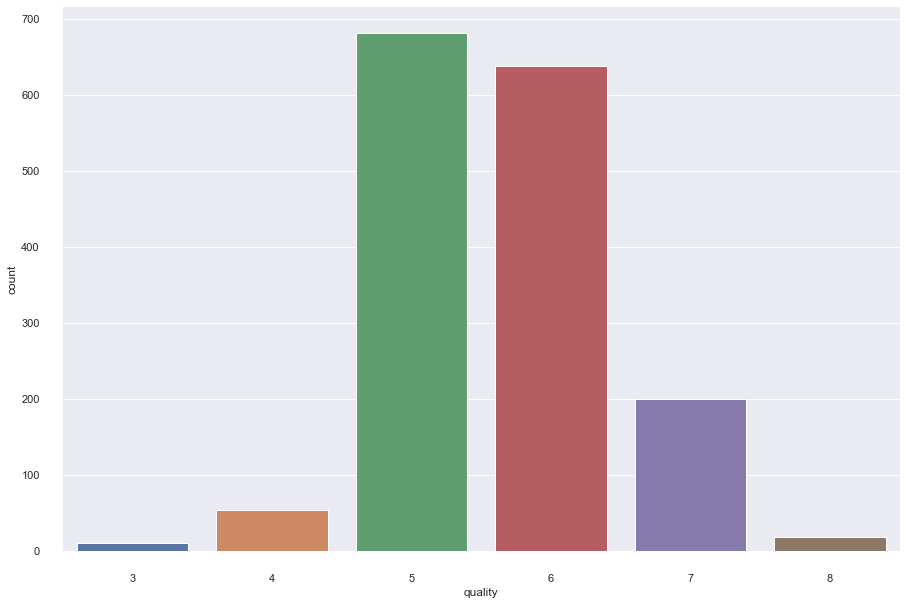

In [86]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot('quality', data=data)
sns.despine(offset=10, trim=True)

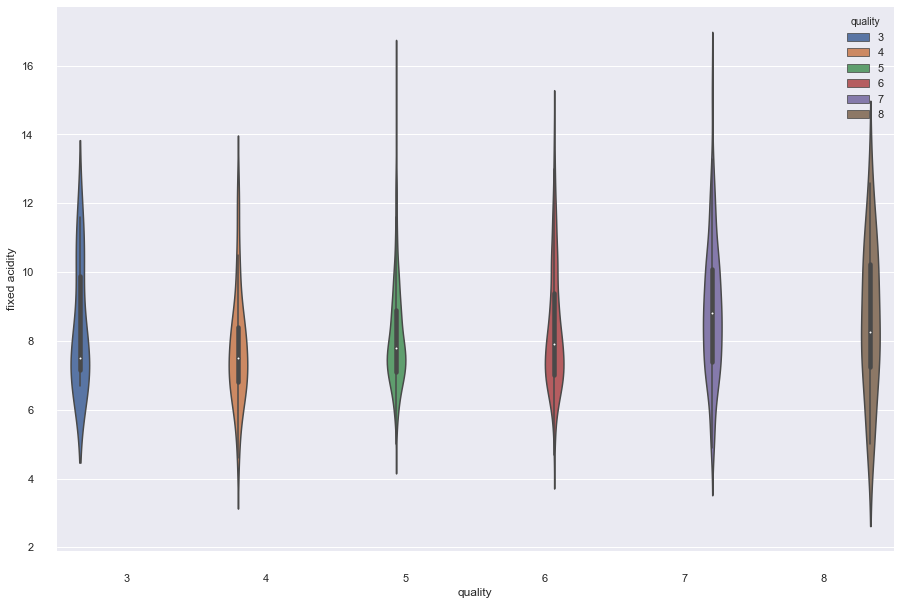

In [87]:
#data visualization
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="quality",y="fixed acidity", hue="quality", data=data);
sns.despine(offset=10, trim=True)

### we can get a general idea of wine quality of overall samples, and against fixed acidity in this violin plot, where interestingly,high quality wines generally have a wider fixed acidity spread than that of low quality wines.

# Preprocessing dataset in pipeline for model training algorithms

In [88]:
y = data.quality #y = target feature
X = data.drop('quality', axis=1) # X = input features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify =y) #stratify training set looks similar to test set

In [89]:
pipeline_rf = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100)) #random forest

### above pipeline transforms the data using StandardScaler(), then fits a model using a random forest regressor

# Model Training

## random forest model training

In [90]:
hyperparameters = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth':[None, 5,3,1]}
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split

In [91]:
pred_rf = clf.predict(X_test)
print("R-square = ", r2_score(y_test, pred_rf))
print ("mean squared error = ", mean_squared_error(y_test, pred_rf))
joblib.dump(clf,'rf_regressor.pkl') #saving rf model

R-square =  0.46524947030691943
mean squared error =  0.34506031249999997


['rf_regressor.pkl']

## Naive Bayes model training

In [92]:
gnb = GaussianNB()
pred_nb = gnb.fit(X_train, y_train).predict(X_test)
print("Naive-Bayes accuracy: ",accuracy_score(y_test, pred_nb, normalize= True))

Naive-Bayes accuracy:  0.559375


## Linear SVC model training

In [93]:
svc_model = LinearSVC(random_state=0)
pred_svc = svc_model.fit(X_train, y_train).predict(X_test)
print("LinearSVC accuracy: ",accuracy_score(y_test, pred_svc, normalize = True))

LinearSVC accuracy:  0.5


C:\Users\mingj\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## KNN model training

In [94]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred_knn = neigh.predict(X_test)
print("KNeighbors accuracy score: ",accuracy_score(y_test, pred_knn))

KNeighbors accuracy score:  0.48125


# Model performance

## Random Forest

In [103]:
#try clusring score visualizer

## Naive Bayes

C:\Users\mingj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


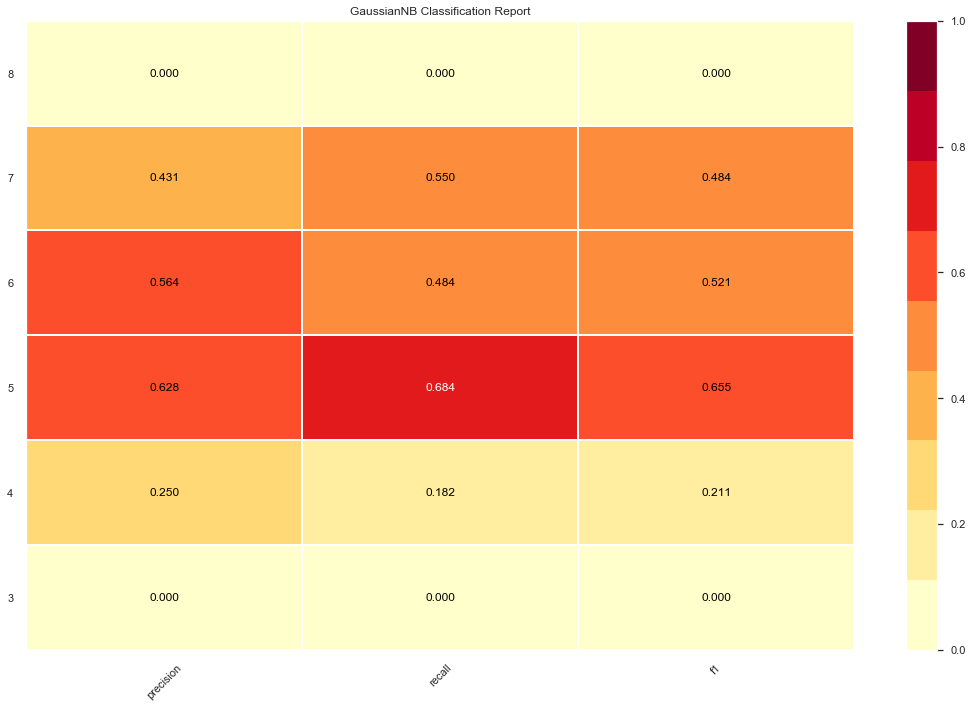

In [97]:
visualizer_nb = ClassificationReport(gnb)
visualizer_nb.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_nb.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_nb.poof() # Draw/show/poof the data

## Linear SVC

C:\Users\mingj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


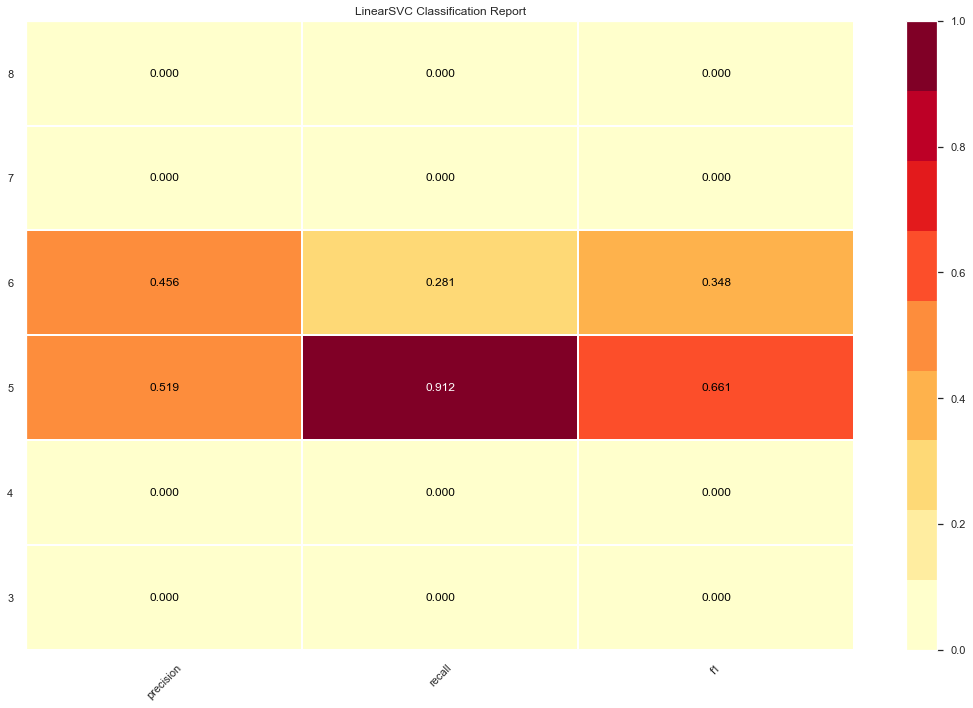

In [104]:
visualizer_svc = ClassificationReport(svc_model)
visualizer_svc.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_svc.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_svc.poof() # Draw/show/poof the data

## KNN

C:\Users\mingj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


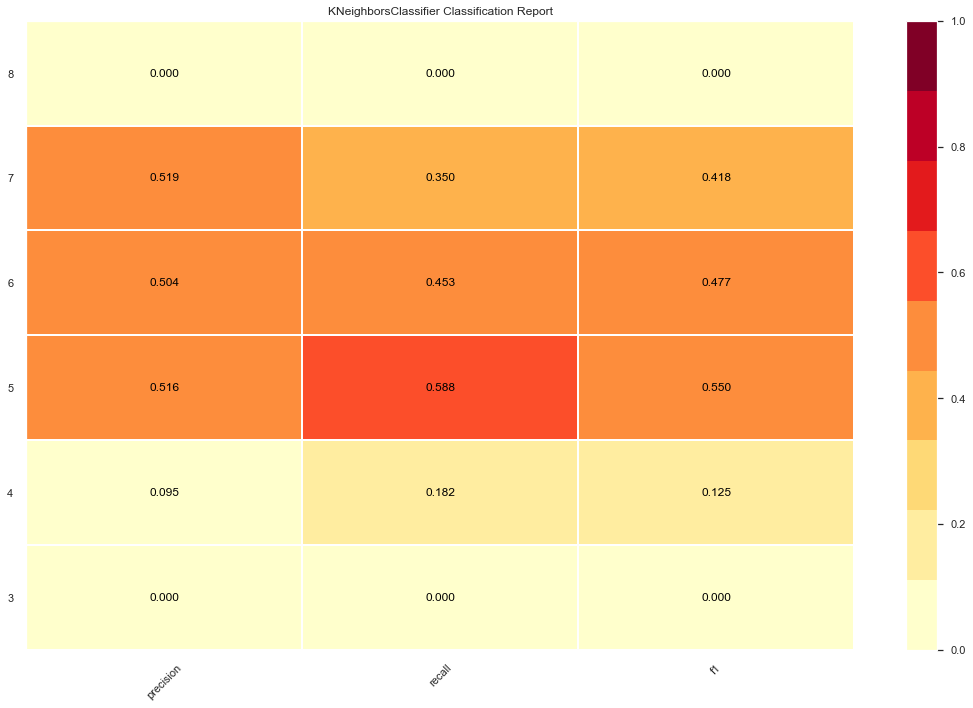

In [106]:
visualizer_knn = ClassificationReport(neigh)
visualizer_knn.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_knn.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_knn.poof() # Draw/show/poof the data